# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
n=200
x=3*(np.random.rand(n,4)-0.5)
y=(2*x[:,1]-x[:,2]+0.5+0.5*np.random.randn(n))>0
y=2*y-1

Text(0, 0.5, 'accuracy')

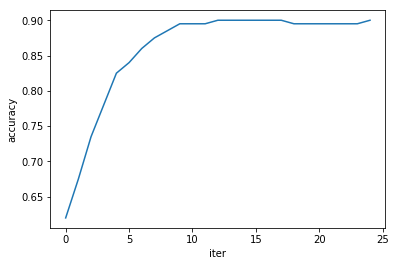

In [15]:
#1. implement batch steepest gradient method
w=np.array([1.,1.,1.,1.])
lam=0.01
steepest_acc=[]
steepest_j=[]
s=0
for i in range(25):
    p=1/(1+np.exp(-y*np.dot(w,x.T)))
    j=np.sum(-y*(1-p)*x.T,axis=1)/n+2*lam*w
    jw=np.sum(np.log(1+np.exp(-y*np.dot(w,x.T))))/n+lam*np.dot(w,w.T)
    steepest_j.append(jw)
    w=w-j 
    f=np.dot(w,x.T)>0
    f=2*f-1
    acc=0
    for i in range(n):
        if f[i]==y[i]:
            acc+=1
    steepest_acc.append(acc/n)
plt.plot(steepest_acc)
plt.xlabel('iter')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

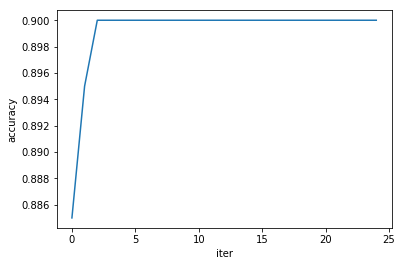

In [27]:
#2. implement Newton based method
w=np.array([1.,1.,1.,1.])
lam=0.01
newton_acc=[]
newton_j=[]
s=0
for i in range(25):
    p=1/(1+np.exp(-y*np.dot(w,x.T)))
    j=np.sum(-y*(1-p)*x.T,axis=1)/n+2*lam*w
    hess=np.dot((p*(1-p)*x.T),x)/n+2*lam
    jw=np.sum(np.log(1+np.exp(-y*np.dot(w,x.T))))/n+lam*np.dot(w,w.T)
    newton_j.append(jw)
    w=w-np.dot(np.linalg.inv(hess),j)
    f=np.dot(w,x.T)>0
    f=2*f-1
    acc=0
    for i in range(n):
        if f[i]==y[i]:
            acc+=1
    newton_acc.append(acc/n)
plt.plot(newton_acc)
plt.xlabel('iter')
plt.ylabel('accuracy')

[]

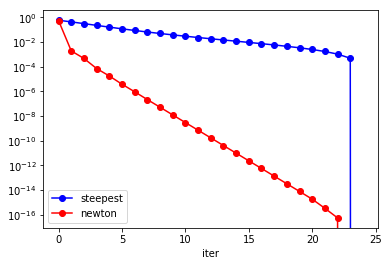

In [28]:
#3. compare the performance 
plt.plot(np.abs(steepest_j-min(steepest_j)),'bo-',label='steepest')
plt.plot(np.abs(newton_j-min(newton_j)),'ro-',label='newton')
plt.xlabel('iter')
plt.legend()
plt.semilogy()

In [10]:
#4. multiclass version of logistic regression
x=3*(np.random.rand(n,3)-0.5)
w=np.array([2,-1,0.5,-3,2,1,1,2,3]).reshape(3,3)
y=np.dot(np.hstack((x[:,1:3],np.ones(n).reshape(n,1))),w)+0.5*np.random.randn(n,3)
y[y<2]=-1
y[y>=2]=1

Text(0, 0.5, 'accuracy')

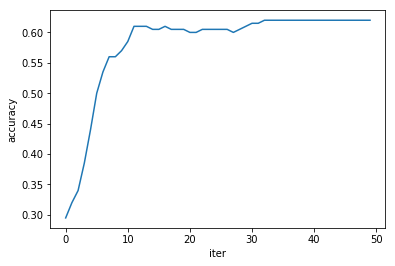

In [11]:
# steepest
w=np.array([2,-1,0.5,-3,2,1,1,2,3]).reshape(3,3)
lam=0.01
steepest_acc=[]
steepest_j=[]
s=0
for i in range(50):
    p=1/(1+np.exp(-y.T*np.dot(w,x.T)))
    j=np.dot(-y.T*(1-p),x)/n+2*lam*w
    jw=np.sum(np.log(1+np.exp(-y.T*np.dot(w,x.T))),axis=1)/n+lam*np.dot(w,w.T)
    steepest_j.append(jw)
    w=w-j 
    f=np.dot(w,x.T)>0
    f=2*f-1
    acc=0
    for i in range(n):
        if (f.T[i]==y[i]).all():
            acc+=1
    steepest_acc.append(acc/n)
plt.plot(steepest_acc)
plt.xlabel('iter')
plt.ylabel('accuracy')

Text(0, 0.5, 'accuracy')

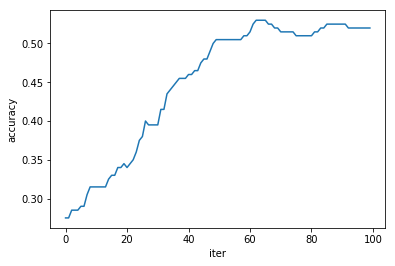

In [12]:
# newton
w=np.array([2,-1,0.5,-3,2,1,1,2,3]).reshape(3,3)
lam=0.01
newton_acc=[]
newton_j=[]
s=0
for i in range(100):
    p=1/(1+np.exp(-y.T*np.dot(w,x.T)))
    j=np.dot(-y.T*(1-p),x)/n+2*lam*w
    hess=np.dot(np.dot(np.dot(p,(1-p).T),x.T),x)/n+2*lam
    jw=np.sum(np.log(1+np.exp(-y.T*np.dot(w,x.T))))/n+lam*np.dot(w,w.T)
    newton_j.append(jw)
    w=w+np.dot(np.linalg.inv(hess),j)
    f=np.dot(w,x.T)>0
    f=2*f-1
    acc=0
    for i in range(n):
        if (f.T[i]==y[i]).all():
            acc+=1
    newton_acc.append(acc/n)
plt.plot(newton_acc)
plt.xlabel('iter')
plt.ylabel('accuracy')